In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%run utils.py

In [2]:
# read geodata of hk
dcca = gpd.read_file("../data/DCCA_21C.geojson").to_crs(epsg=4326)
create_features(dcca)
# read geodata of public market
market = gpd.read_file("../data/PMRK.geojson").to_crs(epsg=4326)
# read geodata of yoshinoya
yoshi = read_json_data("../data/yoshinoya.json",drop_duplicates=True)

In [3]:
def plot_loc(df,ax=None,base=dcca,color='red',name=None,markersize=20,legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
    if legend:
        base.plot("den_pop",ax=ax,legend=True,legend_kwds={'label': "Population Density",'shrink':.8})
    else:
        base.plot("den_pop",ax=ax,legend=False)
    market.plot(ax=ax,markersize=markersize,color="pink",alpha=.4,label="Public Market")
    df.plot(ax=ax,markersize=markersize,color=color,label=name,alpha=.7)
    ax.set_title(f"Sites of {name}(Count: {len(df)})")
    ax.legend()
    return ax

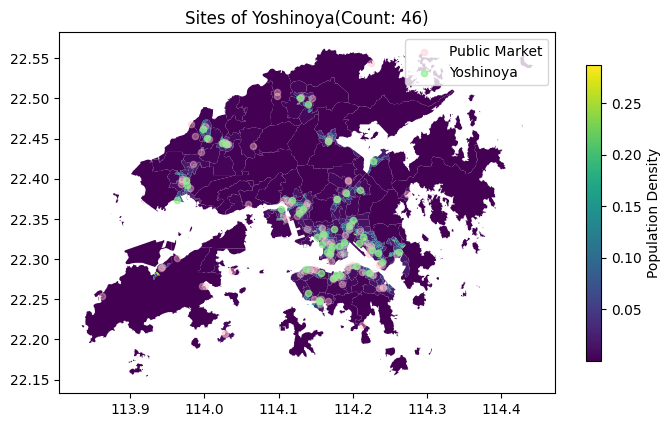

In [4]:
fig,ax = plt.subplots(figsize=(8,4.8))
plot_loc(yoshi,ax=ax, color='lightgreen',name="Yoshinoya",legend=True)
plt.savefig("img/sites_yoshi.png")
plt.show()

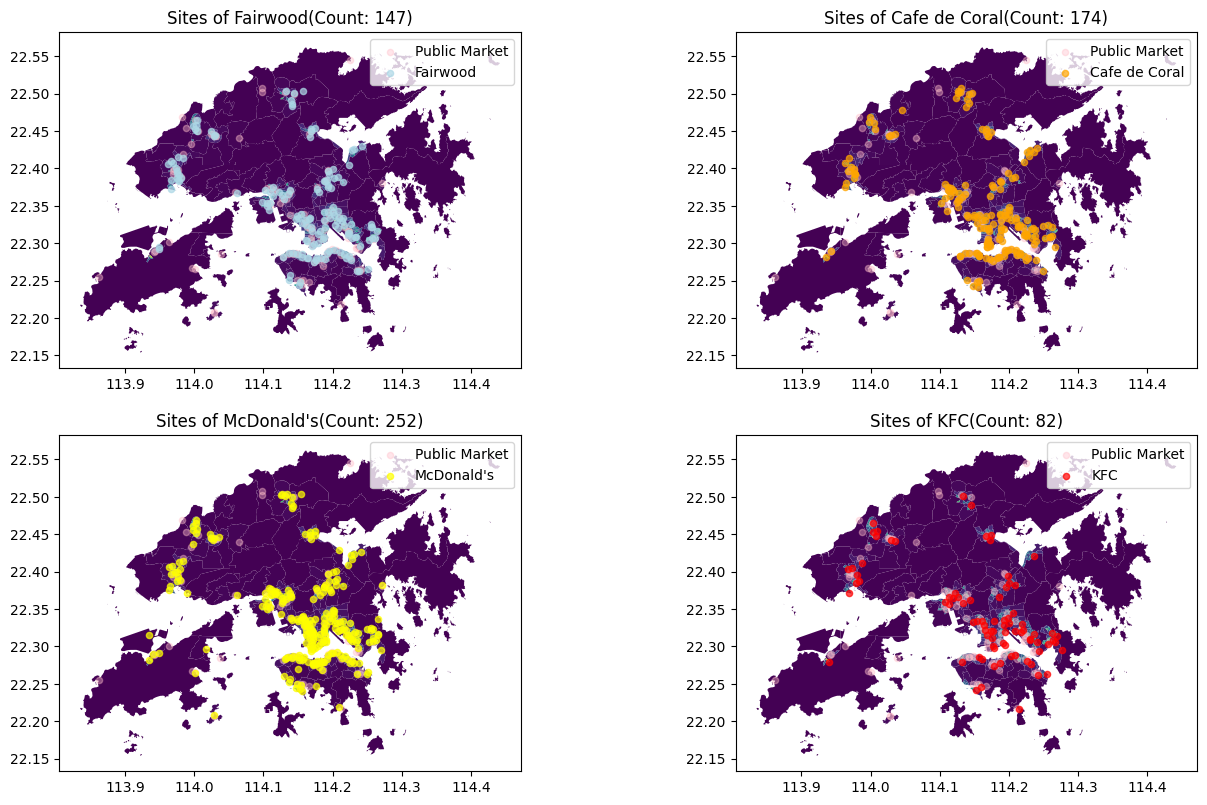

In [5]:
competitor_path = {
    "Fairwood":"../data/fairwood.json",
    "Cafe de Coral":"../data/cdc.json",
    "McDonald's":"../data/mcdonalds.json",
    "KFC":"../data/kfc.json",
}

competitor_color = {
    "Fairwood":"lightblue",
    "Cafe de Coral":"orange",
    "McDonald's":"yellow",
    "KFC":"red"
}

dfs = {}

fig,axes = plt.subplots(2,2,figsize=(16,9.6))
axes = axes.flatten()

for (name, path),color,ax in zip(competitor_path.items(),competitor_color.values(),axes[:4]):
    df = read_json_data(path)
    plot_loc(df,ax=ax, color=color,name=name)
    dfs[name] = df
plt.savefig("img/sites_competitor.png")
plt.show()

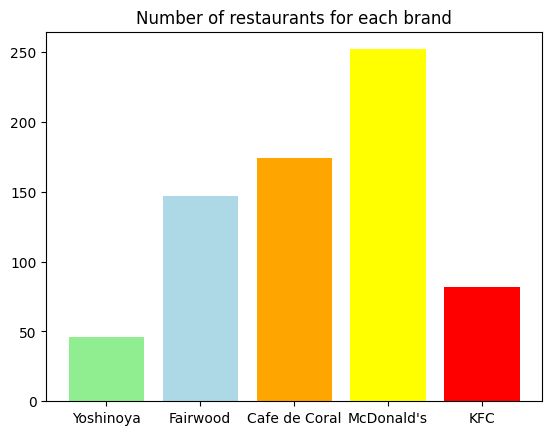

In [6]:
names = ["Yoshinoya",*competitor_path.keys()]
colors = ["lightgreen",*competitor_color.values()]
counts = [len(yoshi),*map(len,dfs.values())]

plt.bar(names,counts,color=colors)
plt.title("Number of restaurants for each brand")
plt.savefig("img/num_sites.png")
plt.show()

In [7]:
def plot_feature_and_store(df,ax=None,feature='t_pop',feature_name='Total Population'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,8))
    dcca.plot(feature,cmap="rainbow",ax=ax,legend=True,legend_kwds={'label': feature_name,'shrink':.8})
    ax.scatter(df.geometry.x,df.geometry.y,edgecolors='k',s=20,facecolors='none')
    ax.set_title(f"{feature_name}")
    return ax

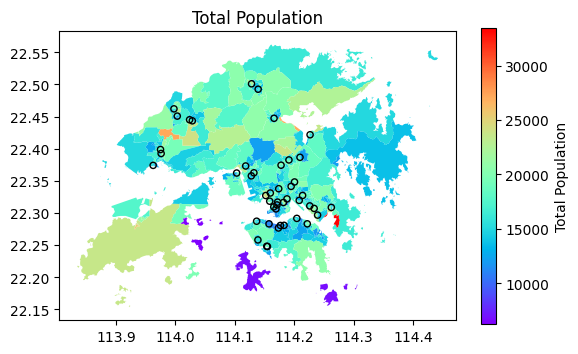

In [8]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_pop',feature_name='Total Population')
plt.show()

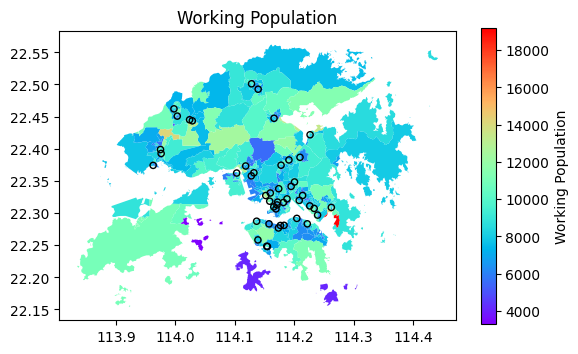

In [9]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_wp',feature_name='Working Population')
plt.show()

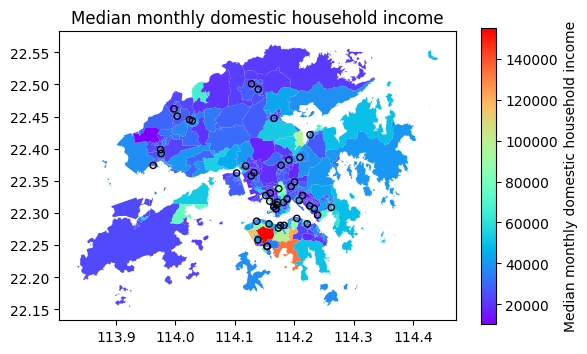

In [10]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='ma_hh',feature_name='Median monthly domestic household income')
plt.show()

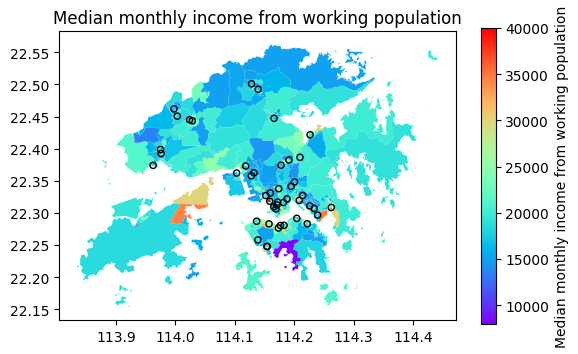

In [11]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_mmearn',feature_name='Median monthly income from working population')
plt.show()

In [12]:
dcca['t_tmmearn'] = dcca.t_mmearn*dcca.t_wp

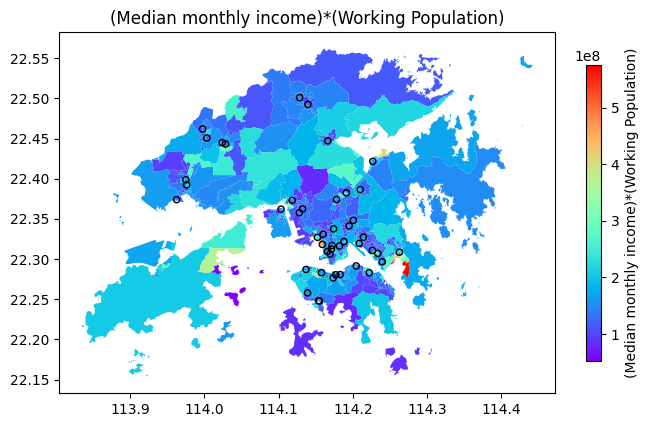

In [13]:
fig, ax = plt.subplots(figsize=(8,4.8))
plot_feature_and_store(yoshi,ax=ax,feature='t_tmmearn',feature_name='(Median monthly income)*(Working Population)')
plt.savefig("img/dcca_t_tmmearn.png")
plt.show()

In [14]:
dcca["den_pop"] = get_density(dcca,"t_pop")

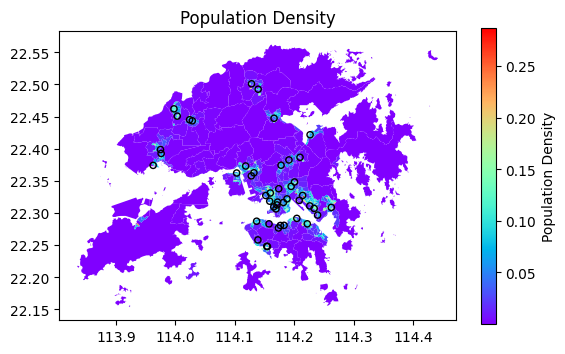

In [15]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='den_pop',feature_name='Population Density')
plt.show()

In [16]:
dcca["den_income"] = dcca.t_mmearn*dcca.den_pop

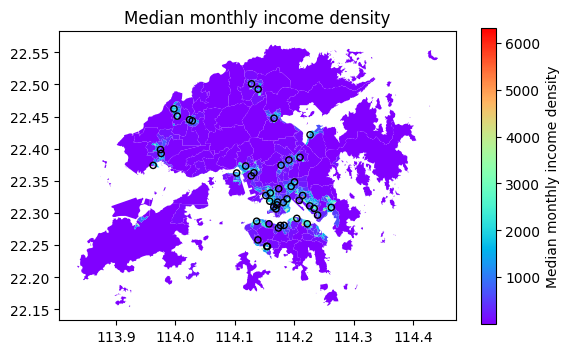

In [17]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='den_income',feature_name='Median monthly income density')
plt.show()

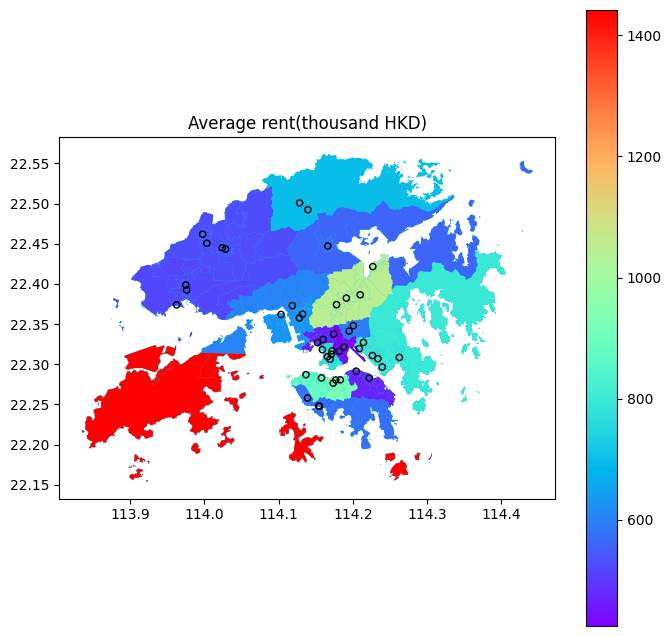

In [18]:
rent = gpd.read_file("../data/Shop_and_Other_Commercial_Assessments.geojson").to_crs(epsg=4326)
rent = gpd.overlay(dcca, rent, how='intersection')
rent['Shop_RV_HKD_In_Thousand'] = rent['Shop_RV_HKD_In_Thousand'].astype(float)
rent['Shop_Number'] = rent['Shop_Number'].astype(float)
rent['avg_rent'] = rent['Shop_RV_HKD_In_Thousand']/rent['Shop_Number']
fig, ax = plt.subplots(figsize=(8,8))
rent.plot('avg_rent',cmap="rainbow",ax=ax,legend=True)
ax.scatter(yoshi.geometry.x,yoshi.geometry.y,edgecolors='k',s=20,facecolors='none')
ax.set_title('Average rent(thousand HKD)')
plt.show()